Boosting algorithms play a crucial role in dealing with bias variance trade-off.  Unlike bagging algorithms, which only controls for high variance in a model, boosting controls both the aspects (bias & variance), and is considered to be more effective. 
<br /><br />
Boosting is a sequential technique which works on the principle of ensemble. It combines a set of weak learners and delivers improved prediction accuracy. 

### Objective

- Learn parameter tuning in gradient boosting algorithm using Python
- Understand how to adjust bias-variance trade-off in machine learning for gradient boosting

### The overall parameters can be divided into 3 categories:
<br /><br />
<b>Tree-Specific Parameters:</b> These affect each individual tree in the model.
<br />
<b>Boosting Parameters:</b> These affect the boosting operation in the model.
<br />
<b>Miscellaneous Parameters:</b> Other parameters for overall functioning.

1. min_samples_split

    - Defines the minimum number of samples (or observations) which are required in a node to be considered for splitting.
    - Used to control over-fitting. Higher values prevent a model from learning relations which might be highly specific to the particular sample selected for a tree.
    - Too high values can lead to under-fitting hence, it should be tuned using CV.
<br /><br />
2. min_samples_leaf

    - Defines the minimum samples (or observations) required in a terminal node or leaf.
    - Used to control over-fitting similar to min_samples_split.
    - Generally lower values should be chosen for imbalanced class problems because the regions in which the minority class will be in majority will be very small.
<br /><br />
3. min_weight_fraction_leaf

    - Similar to min_samples_leaf but defined as a fraction of the total number of observations instead of an integer.
    - Only one of #2 and #3 should be defined.
<br /><br />
4. max_depth

    - The maximum depth of a tree.
    - Used to control over-fitting as higher depth will allow model to learn relations very specific to a particular sample.
    - Should be tuned using CV.
<br /><br />
5. max_leaf_nodes

    - The maximum number of terminal nodes or leaves in a tree.
    - Can be defined in place of max_depth. Since binary trees are created, a depth of ‘n’ would produce a maximum of 2^n leaves.
    - If this is defined, GBM will ignore max_depth.
<br /><br />
6. max_features

    - The number of features to consider while searching for a best split. These will be randomly selected.
    - As a thumb-rule, square root of the total number of features works great but we should check upto 30-40% of the total number of features.
    - Higher values can lead to over-fitting but depends on case to case.

#### overall pseudo-code of the GBM algorithm for 2 classes:

1. Initialize the outcome
2. Iterate from 1 to total number of trees
<br />
  2.1 Update the weights for targets based on previous run (higher for the ones mis-classified)
  <br />
  2.2 Fit the model on selected subsample of data
  <br />
  2.3 Make predictions on the full set of observations
  <br />
  2.4 Update the output with current results taking into account the learning rate
3. Return the final output

This is an extremely simplified (probably naive) explanation of GBM’s working. The parameters which we have considered so far will affect step 2.2, i.e. model building. Lets consider another set of parameters for managing boosting:

7. learning_rate

    - This determines the impact of each tree on the final outcome (step 2.4). GBM works by starting with an initial estimate which is updated using the output of each tree. The learning parameter controls the magnitude of this change in the estimates.
    - Lower values are generally preferred as they make the model robust to the specific characteristics of tree and thus allowing it to generalize well.
    - Lower values would require higher number of trees to model all the relations and will be computationally expensive.
<br /><br />
8. n_estimators
    - The number of sequential trees to be modeled (step 2)
    - Though GBM is fairly robust at higher number of trees but it can still overfit at a point. Hence, this should be tuned using CV for a particular learning rate.
<br /><br />
9. subsample
    - The fraction of observations to be selected for each tree. Selection is done by random sampling.
    - Values slightly less than 1 make the model robust by reducing the variance.
    - Typical values ~0.8 generally work fine but can be fine-tuned further.

<br /><br />
#### Apart from these, there are certain miscellaneous parameters which affect overall functionality:
<br /><br />

10. loss
    - It refers to the loss function to be minimized in each split.
    - It can have various values for classification and regression case. Generally the default values work fine. Other values should be chosen only if you understand their impact on the model.
<br /><br />
11. init
    - This affects initialization of the output.
    - This can be used if we have made another model whose outcome is to be used as the initial estimates for GBM.
<br /><br />
12. random_state
    - The random number seed so that same random numbers are generated every time.
    - This is important for parameter tuning. If we don’t fix the random number, then we’ll have different outcomes for subsequent runs on the same parameters and it becomes difficult to compare models.
    - It can potentially result in overfitting to a particular random sample selected. We can try running models for different random samples, which is computationally expensive and generally not used.
<br /><br />
13. verbose
    - The type of output to be printed when the model fits. The different values can be:
      - 0: no output generated (default)
      - 1: output generated for trees in certain intervals
      - greater than 1: output generated for all trees
<br /><br />
14. warm_start
    - This parameter has an interesting application and can help a lot if used judicially.
    - Using this, we can fit additional trees on previous fits of a model. It can save a lot of time and you should explore this option for advanced applications
<br /><br />
15. presort 
    - Select whether to presort data for faster splits.
    - It makes the selection automatically by default but it can be changed if needed.

### Data Preparation

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
#Load data:
train = pd.read_csv('Train_nyOWmfK.csv', encoding='latin1')
test = pd.read_csv('Test_bCtAN1w.csv', encoding='latin1')

In [3]:
train.shape, test.shape

((87020, 26), (37717, 24))

In [4]:
train.dtypes

ID                        object
Gender                    object
City                      object
Monthly_Income             int64
DOB                       object
Lead_Creation_Date        object
Loan_Amount_Applied      float64
Loan_Tenure_Applied      float64
Existing_EMI             float64
Employer_Name             object
Salary_Account            object
Mobile_Verified           object
Var5                       int64
Var1                      object
Loan_Amount_Submitted    float64
Loan_Tenure_Submitted    float64
Interest_Rate            float64
Processing_Fee           float64
EMI_Loan_Submitted       float64
Filled_Form               object
Device_Type               object
Var2                      object
Source                    object
Var4                       int64
LoggedIn                   int64
Disbursed                  int64
dtype: object

In [5]:
#Combine into data:
train['source']= 'train'
test['source'] = 'test'
data=pd.concat([train, test],ignore_index=True)
data.shape

C:\Users\Kerry\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


(124737, 27)

In [7]:
# Check Missing Values
data.apply(lambda x: sum(x.isnull()))

City                      1401
DOB                          0
Device_Type                  0
Disbursed                37717
EMI_Loan_Submitted       84901
Employer_Name              113
Existing_EMI               111
Filled_Form                  0
Gender                       0
ID                           0
Interest_Rate            84901
Lead_Creation_Date           0
Loan_Amount_Applied        111
Loan_Amount_Submitted    49535
Loan_Tenure_Applied        111
Loan_Tenure_Submitted    49535
LoggedIn                 37717
Mobile_Verified              0
Monthly_Income               0
Processing_Fee           85346
Salary_Account           16801
Source                       0
Var1                         0
Var2                         0
Var4                         0
Var5                         0
source                       0
dtype: int64

In [25]:
# Look at categories of all object variables
var = ['Gender','Salary_Account','Mobile_Verified','Var1','Filled_Form','Device_Type','Var2','Source']
for v in var:
    print ('\nFrequency count for variable %s' %v)
    print (data[v].value_counts())


Frequency count for variable Gender
Male      71398
Female    53339
Name: Gender, dtype: int64

Frequency count for variable Salary_Account
HDFC Bank                                          25180
ICICI Bank                                         19547
State Bank of India                                17110
Axis Bank                                          12590
Citibank                                            3398
Kotak Bank                                          2955
IDBI Bank                                           2213
Punjab National Bank                                1747
Bank of India                                       1713
Bank of Baroda                                      1675
Standard Chartered Bank                             1434
Canara Bank                                         1385
Union Bank of India                                 1330
Yes Bank                                            1120
ING Vysya                                            996
Corp

### Handle Individual Variables

In [26]:
# City Variable
len(data['City'].unique())
#drop city because too many unique
data.drop('City',axis=1,inplace=True)

In [27]:
# Determine Age from DOB
data['DOB'].head()
#Create age variable:
data['Age'] = data['DOB'].apply(lambda x: 115 - int(x[-2:]))
data['Age'].head()
#drop DOB:
data.drop('DOB',axis=1,inplace=True)

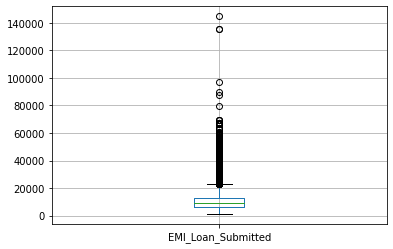

In [28]:
# EMI_Load_Submitted
data.boxplot(column=['EMI_Loan_Submitted'],return_type='axes')

In [29]:
#Majority values missing so Icreate a new variable stating whether this is missing or not:
data['EMI_Loan_Submitted_Missing'] = data['EMI_Loan_Submitted'].apply(lambda x: 1 if pd.isnull(x) else 0)
data[['EMI_Loan_Submitted','EMI_Loan_Submitted_Missing']].head(10)

,EMI_Loan_Submitted,EMI_Loan_Submitted_Missing
0,NaN,1
1,6762.90,0
2,NaN,1
3,NaN,1
4,NaN,1
5,6978.92,0
6,NaN,1
7,NaN,1
8,30824.65,0
9,10883.38,0


In [30]:
# drop original variable
data.drop('EMI_Loan_Submitted',axis=1,inplace=True)

In [31]:
# Employer Name
len(data['Employer_Name'].value_counts())
#Drop the variable because too many unique values. Another option could be to categorize them manually
data.drop('Employer_Name',axis=1,inplace=True)

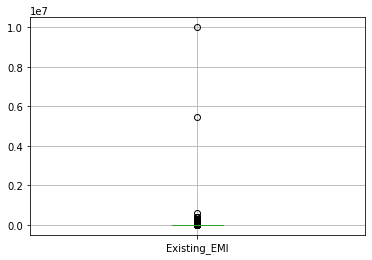

In [32]:
# Existing EMI
data.boxplot(column='Existing_EMI',return_type='axes')

In [33]:
data['Existing_EMI'].describe()

count    1.246260e+05
mean     3.636342e+03
std      3.369124e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.500000e+03
max      1.000000e+07
Name: Existing_EMI, dtype: float64

In [34]:
# Impute by median (0) because just 111 missing:
data['Existing_EMI'].fillna(0, inplace=True)

In [36]:
# Interest Rate
#Majority values missing so create a new variable stating whether this is missing or not:
data['Interest_Rate_Missing'] = data['Interest_Rate'].apply(lambda x: 1 if pd.isnull(x) else 0)
data[['Interest_Rate','Interest_Rate_Missing']].head(10)

,Interest_Rate,Interest_Rate_Missing
0,NaN,1
1,13.25,0
2,NaN,1
3,NaN,1
4,NaN,1
5,13.99,0
6,NaN,1
7,NaN,1
8,14.85,0
9,18.25,0


In [37]:
data.drop('Interest_Rate',axis=1,inplace=True)

In [38]:
# Lead Creation Date
#Drop this variable because doesn't appear to affect much intuitively
data.drop('Lead_Creation_Date',axis=1,inplace=True)

In [39]:
# Loan Amount and Tenure applied
#Impute with median because only 111 missing:
data['Loan_Amount_Applied'].fillna(data['Loan_Amount_Applied'].median(),inplace=True)
data['Loan_Tenure_Applied'].fillna(data['Loan_Tenure_Applied'].median(),inplace=True)

In [40]:
# Loan Amount and Tenure selected

#High proportion missing so create a new var whether present or not
data['Loan_Amount_Submitted_Missing'] = data['Loan_Amount_Submitted'].apply(lambda x: 1 if pd.isnull(x) else 0)
data['Loan_Tenure_Submitted_Missing'] = data['Loan_Tenure_Submitted'].apply(lambda x: 1 if pd.isnull(x) else 0)

In [41]:
#Remove old vars
data.drop(['Loan_Amount_Submitted','Loan_Tenure_Submitted'],axis=1,inplace=True)

In [42]:
# Remove logged-in
data.drop('LoggedIn',axis=1,inplace=True)

In [43]:
# Remove salary account
#Salary account has mnay banks which have to be manually grouped
data.drop('Salary_Account',axis=1,inplace=True)

In [44]:
# Processing_Fee

#High proportion missing so create a new var whether present or not
data['Processing_Fee_Missing'] = data['Processing_Fee'].apply(lambda x: 1 if pd.isnull(x) else 0)
#drop old
data.drop('Processing_Fee',axis=1,inplace=True)

In [45]:
# Source
data['Source'] = data['Source'].apply(lambda x: 'others' if x not in ['S122','S133'] else x)
data['Source'].value_counts()

S122      55249
S133      42900
others    26588
Name: Source, dtype: int64

### Final Data

In [46]:
data.apply(lambda x: sum(x.isnull()))

Device_Type                          0
Disbursed                        37717
Existing_EMI                         0
Filled_Form                          0
Gender                               0
ID                                   0
Loan_Amount_Applied                  0
Loan_Tenure_Applied                  0
Mobile_Verified                      0
Monthly_Income                       0
Source                               0
Var1                                 0
Var2                                 0
Var4                                 0
Var5                                 0
source                               0
Age                                  0
EMI_Loan_Submitted_Missing           0
Interest_Rate_Missing                0
Loan_Amount_Submitted_Missing        0
Loan_Tenure_Submitted_Missing        0
Processing_Fee_Missing               0
dtype: int64

In [47]:
data.dtypes

Device_Type                       object
Disbursed                        float64
Existing_EMI                     float64
Filled_Form                       object
Gender                            object
ID                                object
Loan_Amount_Applied              float64
Loan_Tenure_Applied              float64
Mobile_Verified                   object
Monthly_Income                     int64
Source                            object
Var1                              object
Var2                              object
Var4                               int64
Var5                               int64
source                            object
Age                                int64
EMI_Loan_Submitted_Missing         int64
Interest_Rate_Missing              int64
Loan_Amount_Submitted_Missing      int64
Loan_Tenure_Submitted_Missing      int64
Processing_Fee_Missing             int64
dtype: object

#### Numerical Coding

In [48]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
var_to_encode = ['Device_Type','Filled_Form','Gender','Var1','Var2','Mobile_Verified','Source']
for col in var_to_encode:
    data[col] = le.fit_transform(data[col])

#### One-Hot Coding

In [49]:
data = pd.get_dummies(data, columns=var_to_encode)
data.columns

Index(['Disbursed', 'Existing_EMI', 'ID', 'Loan_Amount_Applied',
       'Loan_Tenure_Applied', 'Monthly_Income', 'Var4', 'Var5', 'source',
       'Age', 'EMI_Loan_Submitted_Missing', 'Interest_Rate_Missing',
       'Loan_Amount_Submitted_Missing', 'Loan_Tenure_Submitted_Missing',
       'Processing_Fee_Missing', 'Device_Type_0', 'Device_Type_1',
       'Filled_Form_0', 'Filled_Form_1', 'Gender_0', 'Gender_1', 'Var1_0',
       'Var1_1', 'Var1_2', 'Var1_3', 'Var1_4', 'Var1_5', 'Var1_6', 'Var1_7',
       'Var1_8', 'Var1_9', 'Var1_10', 'Var1_11', 'Var1_12', 'Var1_13',
       'Var1_14', 'Var1_15', 'Var1_16', 'Var1_17', 'Var1_18', 'Var2_0',
       'Var2_1', 'Var2_2', 'Var2_3', 'Var2_4', 'Var2_5', 'Var2_6',
       'Mobile_Verified_0', 'Mobile_Verified_1', 'Source_0', 'Source_1',
       'Source_2'],
      dtype='object')

#### Separate train & test

In [51]:
train = data.loc[data['source']=='train']
test = data.loc[data['source']=='test']

In [52]:
train.drop('source',axis=1,inplace=True)
test.drop(['source','Disbursed'],axis=1,inplace=True)

C:\Users\Kerry\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [53]:
train.to_csv('train_modified.csv',index=False)
test.to_csv('test_modified.csv',index=False)

1. City variable dropped because of too many categories
2. DOB converted to Age | DOB dropped
3. EMI_Loan_Submitted_Missing created which is 1 if EMI_Loan_Submitted was missing else 0 | Original variable EMI_Loan_Submitted dropped
4. EmployerName dropped because of too many categories
5. Existing_EMI imputed with 0 (median) since only 111 values were missing
6. Interest_Rate_Missing created which is 1 if Interest_Rate was missing else 0 | Original variable Interest_Rate dropped
7. Lead_Creation_Date dropped because made little intuitive impact on outcome
8. Loan_Amount_Applied, Loan_Tenure_Applied imputed with median values
9. Loan_Amount_Submitted_Missing created which is 1 if Loan_Amount_Submitted was missing else 0 | Original variable Loan_Amount_Submitted dropped
10. Loan_Tenure_Submitted_Missing created which is 1 if Loan_Tenure_Submitted was missing else 0 | Original variable Loan_Tenure_Submitted dropped
11. LoggedIn, Salary_Account dropped
12. Processing_Fee_Missing created which is 1 if Processing_Fee was missing else 0 | Original variable Processing_Fee dropped
13. Source – top 2 kept as is and all others combined into different category
14. Numerical and One-Hot-Coding performed

### Parameter Tuning

In [2]:
#Import libraries:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn.model_selection import cross_validate, GridSearchCV   #Additional sklearn function & performing grid search
from sklearn import metrics 

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

train = pd.read_csv('train_modified.csv')
target = 'Disbursed'
IDcol = 'ID'

Before proceeding further, define a function which will help us create GBM models and perform cross-validation.

In [3]:
from sklearn.model_selection import cross_val_score

def modelfit(alg, dtrain, predictors, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['Disbursed'])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score =cross_val_score(alg, dtrain[predictors], dtrain['Disbursed'], cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(dtrain['Disbursed'].values, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['Disbursed'], dtrain_predprob))
    
    if performCV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

Start by creating a <b>baseline model</b>. In this case, the evaluation metric is AUC so using any constant value will give 0.5 as result. Typically, a good baseline can be a GBM model with default parameters, i.e. without any tuning


Model Report
Accuracy : 0.9856
AUC Score (Train): 0.862264
CV Score : Mean - 0.831884 | Std - 0.009558427 | Min - 0.8195451 | Max - 0.8438424


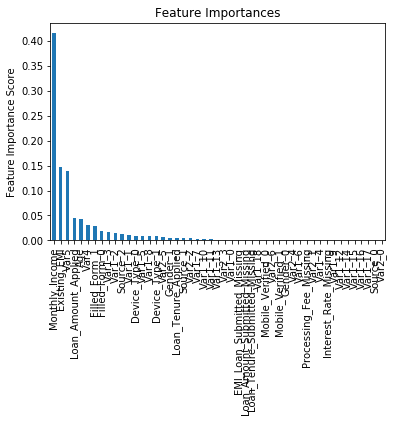

In [4]:
#Choose all predictors except target & IDcols
predictors = [x for x in train.columns if x not in [target, IDcol]]
gbm0 = GradientBoostingClassifier(random_state=10)
modelfit(gbm0, train, predictors)

So, the mean CV score is 0.8319 and we should expect our model to do better than this.

### General Approach for Parameter Tuning

There are two types of parameter to be tuned here – tree based and boosting parameters. There are no optimum values for learning rate as low values always work better, given that we train on sufficient number of trees.
<br /><br />
Though, GBM is robust enough to not overfit with increasing trees, but a high number for pa particular learning rate can lead to overfitting. But as we reduce the learning rate and increase trees, the computation becomes expensive and would take a long time to run on standard personal computers.
<br /><br />
Keeping all this in mind, we can take the following approach:
<br /><br />
1. Choose a relatively <b>high learning rate</b>. Generally the default value of 0.1 works but somewhere between 0.05 to 0.2 should work for different problems
2. Determine the <b>optimum number of trees for this learning rate</b>. This should range around 40-70. Remember to choose a value on which your system can work fairly fast. This is because it will be used for testing various scenarios and determining the tree parameters.
3. <b>Tune tree-specific parameters</b> for decided learning rate and number of trees. Note that we can choose different parameters to define a tree and I’ll take up an example here.
4. <b>Lower the learning rate</b> and increase the estimators proportionally to get more robust models.

### Fix learning rate and number of estimators for tuning tree-based parameters

In order to decide on boosting parameters, we need to set some initial values of other parameters. Lets take the following values:
<br /><br />
1. min_samples_split = 500 : This should be ~0.5-1% of total values. Since this is imbalanced class problem, we’ll take a small value from the range.
2. min_samples_leaf = 50 : Can be selected based on intuition. This is just used for preventing overfitting and again a small value because of imbalanced classes.
3. max_depth = 8 : Should be chosen (5-8) based on the number of observations and predictors. This has 87K rows and 49 columns so lets take 8 here.
4. max_features = ‘sqrt’ : Its a general thumb-rule to start with square root.
5. subsample = 0.8 : This is a commonly used used start value
<br /><br />

Note that all the above are just initial estimates and will be tuned later. Lets take the default learning rate of 0.1 here and check the optimum number of trees for that. For this purpose, we can do a grid search and test out values from 20 to 80 in steps of 10.

In [62]:
#Choose all predictors except target & IDcols
predictors = [x for x in train.columns if x not in [target, IDcol]]
param_test1 = {'n_estimators':range(20,81,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(train[predictors],train[target])

C:\Users\Kerry\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=8,
                                                  max_features='sqrt',
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=50,
                                                  min_samples_split=500,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
    

The output can be checked using following command

In [64]:
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([ 4.4454422 ,  5.22652049,  7.06172681,  8.72319546, 10.90400162,
         12.25440745, 11.78960671]),
  'std_fit_time': array([0.52773061, 0.39988444, 0.09895584, 0.21542289, 0.54919863,
         0.25755247, 1.69314316]),
  'mean_score_time': array([0.07040024, 0.07760034, 0.0824007 , 0.10640182, 0.12080407,
         0.12960129, 0.1071991 ]),
  'std_score_time': array([0.00966508, 0.01175767, 0.00320747, 0.00823801, 0.01567504,
         0.02434653, 0.02122479]),
  'param_n_estimators': masked_array(data=[20, 30, 40, 50, 60, 70, 80],
               mask=[False, False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'n_estimators': 20},
   {'n_estimators': 30},
   {'n_estimators': 40},
   {'n_estimators': 50},
   {'n_estimators': 60},
   {'n_estimators': 70},
   {'n_estimators': 80}],
  'split0_test_score': array([0.81480717, 0.81575033, 0.81904375, 0.81995696, 0.82005096,
         0.82014704, 0.82051296]),

Here we got 60 as the optimal estimators for 0.1 learning rate. Note that 60 is a reasonable value and can be used as it is. 
<br /><br />
But it might not be the same in all cases. Other situations:
1. If the value is around 20, you might want to try lowering the learning rate to 0.05 and re-run grid search
2. If the values are too high ~100, tuning the other parameters will take long time and you can try a higher learning rate

### Tuning tree-specific parameters

Steps
1. Tune max_depth and num_samples_split
2. Tune min_samples_leaf
3. Tune max_features

The order of tuning variables should be decided carefully. You should take the variables with a higher impact on outcome first. For instance, max_depth and min_samples_split have a significant impact and we’re tuning those first.
<br /><br />
<b>Important Note:</b> I’ll be doing some heavy-duty grid searched in this section. The time of running depending on your system. You can vary the number of values you are testing based on what your system can handle.
<br /><br />
To start with, we test max_depth values of 5 to 10 in steps of 2 and min_samples_split from 200 to 1000 in steps of 50. These are just based on my intuition. You can set wider ranges as well and then perform multiple iterations for smaller ranges.

In [65]:
param_test2 = {'max_depth':range(5,11,2), 'min_samples_split':range(200,1001,50)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(train[predictors],train[target])
gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_

C:\Users\Kerry\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'mean_fit_time': array([ 8.53294492,  7.65840583,  7.57015977,  7.20685377,  7.90604324,
          7.58772621,  7.57760239,  7.21235156,  7.37120466,  9.58251467,
          9.52411313,  7.31680269,  7.02759218,  7.0043344 ,  6.97426338,
          7.00372801,  7.01155558,  9.48311467,  9.43626332,  9.37801061,
          9.39690328,  9.30579123,  9.2509594 ,  9.72720609,  9.15541182,
          9.18875451,  9.21690326,  9.2703198 ,  9.1440033 ,  9.22601366,
          9.284232  ,  9.10574126,  9.20616679,  9.69200888, 12.52148786,
         11.68822789, 11.87360625, 11.85411191, 11.59035096, 11.53830328,
         11.51440415, 11.37048578, 11.40030274, 11.41327629, 11.31921964,
         11.32396088, 11.2957191 , 11.27355328, 11.24160728, 11.20400581,
          9.93888602]),
  'std_fit_time': array([0.50107396, 0.2755587 , 0.27417467, 0.07520316, 0.31346928,
         0.42184348, 0.24681578, 0.10869603, 0.33660634, 1.62662827,
         1.60949121, 0.45674368, 0.10588012, 0.10732588, 0.073694

Here, we have run 51 combinations and the ideal values are 7 for max_depth and 350 for min_samples_split. 

Next, we try the max_depth of 9 for higher min_samples_split. Also, we can test for 5 values of min_samples_leaf, from 30 to 70 in steps of 10, along with higher min_samples_split.

In [76]:
param_test3 = {'min_samples_split':range(1000,2001,100), 'min_samples_leaf':range(30,71,10)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=9,max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(train[predictors],train[target])
gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_

C:\Users\Kerry\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'mean_fit_time': array([11.07838492, 10.94154682, 10.85717683, 10.88330722, 10.69201884,
         10.706778  , 10.70179219, 10.40269704, 10.72401233, 10.72255616,
         10.59208527, 11.54513736, 13.19472046, 12.48008361, 11.76308088,
         11.18050218, 11.4411612 , 11.3117743 , 10.48794794, 10.23400369,
         10.14400506, 10.19400902, 10.6700078 , 10.67200613, 10.45800738,
         10.56401577, 10.27200665, 10.49400473, 10.32401381, 10.82457843,
         11.23250203, 10.37173648, 10.12400436, 10.64400668, 10.54801311,
         10.55103235, 10.4519969 , 10.66601076, 10.26000719, 10.37800341,
         10.14400644, 10.31800308, 10.18800602, 10.22200513, 10.63400688,
         10.50800667, 10.51201477, 10.40800238, 10.44800949, 10.3260078 ,
         10.29800615, 10.26800575, 10.24000134, 11.77628107, 13.95879183]),
  'std_fit_time': array([0.13589239, 0.24494475, 0.10245681, 0.26818205, 0.23399563,
         0.07189266, 0.19936281, 0.07827067, 0.13373839, 0.17344945,
         0.12

Here we get the optimum values as 1900 for min_samples_split and 60 for min_samples_leaf. Also, we can see the CV score slightly increased to 0.83840. Let’s fit the model again on this and have a look at the feature importance.


Model Report
Accuracy : 0.9854
AUC Score (Train): 0.887847
CV Score : Mean - 0.8384044 | Std - 0.01029355 | Min - 0.8231324 | Max - 0.8512


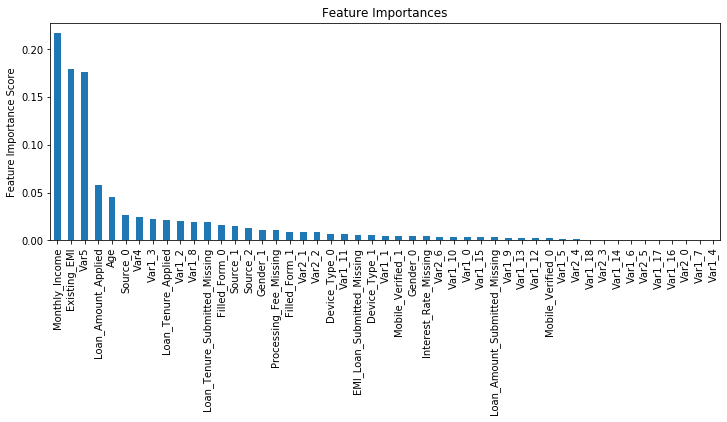

In [77]:
modelfit(gsearch3.best_estimator_, train, predictors)

Comparing the feature importance of this model with the baseline model, we find that now we are able to derive value from many more variables. Also, earlier it placed too much importance on some variables but now the distribution is better.
<br /><br />
Now lets tune the last tree-parameters, i.e. max_features by trying 7 values from 7 to 19 in steps of 2.

In [78]:
param_test4 = {'max_features':range(7,20,2)}
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=9, min_samples_split=1900, min_samples_leaf=60, subsample=0.8, random_state=10),
param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(train[predictors],train[target])
gsearch4.cv_results_, gsearch4.best_params_, gsearch4.best_score_

C:\Users\Kerry\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'mean_fit_time': array([10.10173779, 11.96000643, 13.58000779, 15.32800751, 16.99001079,
         18.73624554, 17.76394982]),
  'std_fit_time': array([0.30565849, 0.14435938, 0.20228913, 0.21976272, 0.1769733 ,
         0.12053467, 2.20821401]),
  'mean_score_time': array([0.11200023, 0.11600118, 0.10599995, 0.11600161, 0.11400075,
         0.10800047, 0.09000072]),
  'std_score_time': array([0.00979817, 0.00800052, 0.01199949, 0.00800038, 0.01019825,
         0.00979709, 0.0244967 ]),
  'param_max_features': masked_array(data=[7, 9, 11, 13, 15, 17, 19],
               mask=[False, False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'max_features': 7},
   {'max_features': 9},
   {'max_features': 11},
   {'max_features': 13},
   {'max_features': 15},
   {'max_features': 17},
   {'max_features': 19}],
  'split0_test_score': array([0.82313239, 0.82281651, 0.82474656, 0.82091952, 0.82590058,
         0.82876208, 0.82873763]),
  '

With this we have the final tree-parameters as:
<br /><br />
- min_samples_split: 1900
- min_samples_leaf: 60
- max_depth: 9
- max_features: 11

### Tuning subsample and making models with lower learning rate

The next step would be try different subsample values. Lets take values 0.6,0.7,0.75,0.8,0.85,0.9.

In [5]:
param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
gsearch5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=9,min_samples_split=1900, min_samples_leaf=60, subsample=0.8, random_state=10,max_features=11),
param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch5.fit(train[predictors],train[target])
gsearch5.cv_results_, gsearch5.best_params_, gsearch5.best_score_

C:\Users\Kerry\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'mean_fit_time': array([12.40387383, 13.2324441 , 14.46239443, 15.93590341, 15.00766344,
         14.17087808]),
  'std_fit_time': array([0.31661869, 0.37330191, 0.28059819, 0.3267584 , 0.98927329,
         3.8531846 ]),
  'mean_score_time': array([0.11279836, 0.12360468, 0.14863467, 0.11408477, 0.12319956,
         0.09800119]),
  'std_score_time': array([0.00992845, 0.02643129, 0.01911745, 0.00483416, 0.02118566,
         0.02993485]),
  'param_subsample': masked_array(data=[0.6, 0.7, 0.75, 0.8, 0.85, 0.9],
               mask=[False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'subsample': 0.6},
   {'subsample': 0.7},
   {'subsample': 0.75},
   {'subsample': 0.8},
   {'subsample': 0.85},
   {'subsample': 0.9}],
  'split0_test_score': array([0.81904479, 0.81779493, 0.82181539, 0.82474656, 0.82164034,
         0.82606288]),
  'split1_test_score': array([0.83241707, 0.83205631, 0.83182158, 0.83327208, 0.83157549,
         0.

Here, we found 0.8 as the optimum value. Finally, we have all the parameters needed. Now, we need to lower the learning rate and increase the number of estimators proportionally. Note that these trees might not be the most optimum values but a good benchmark.
<br /><br />
As trees increase, it will become increasingly computationally expensive to perform CV and find the optimum values. 
<br /><br />
Lets decrease the learning rate to <b>half</b>, i.e. 0.05 with twice (120) the number of trees.


Model Report
Accuracy : 0.9854
AUC Score (Train): 0.893434
CV Score : Mean - 0.8403267 | Std - 0.01080803 | Min - 0.8268969 | Max - 0.8541909


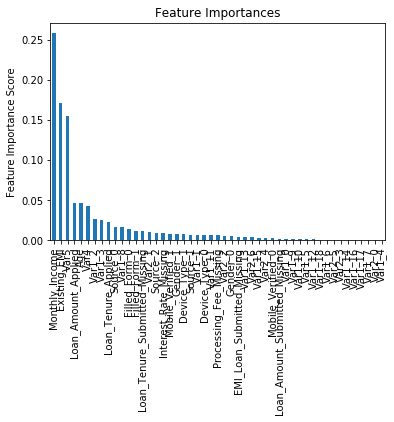

In [7]:
predictors = [x for x in train.columns if x not in [target, IDcol]]
gbm_tuned_1 = GradientBoostingClassifier(learning_rate=0.05, n_estimators=120,max_depth=9, min_samples_split=1900,min_samples_leaf=60, subsample=0.80, random_state=10, max_features=11)
modelfit(gbm_tuned_1, train, predictors)

Now lets reduce to <b>one-tenth</b> of the original value, i.e. 0.01 for 600 trees.


Model Report
Accuracy : 0.9854
AUC Score (Train): 0.894585
CV Score : Mean - 0.8403162 | Std - 0.009755589 | Min - 0.8261789 | Max - 0.8523824


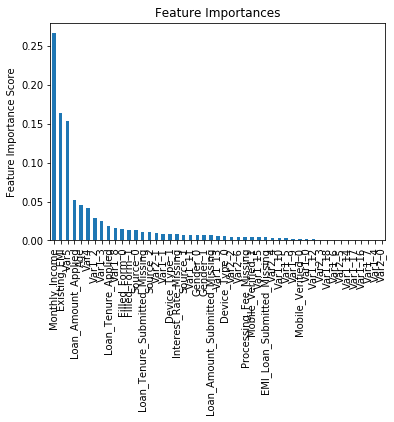

In [8]:
predictors = [x for x in train.columns if x not in [target, IDcol]]
gbm_tuned_2 = GradientBoostingClassifier(learning_rate=0.01, n_estimators=600,max_depth=9, min_samples_split=1900,min_samples_leaf=60, subsample=0.80, random_state=10, max_features=11)
modelfit(gbm_tuned_2, train, predictors)

Lets decrease to <b>one-twentieth</b> of the original value, i.e. 0.005 for 1200 trees.


Model Report
Accuracy : 0.9854
AUC Score (Train): 0.894553


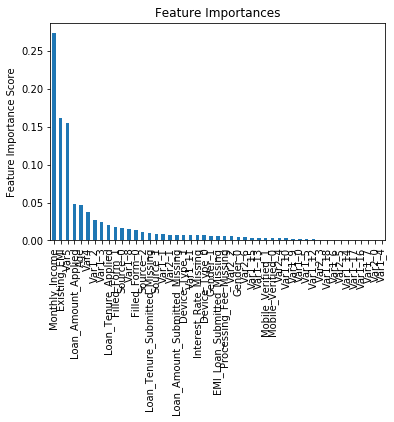

In [9]:
predictors = [x for x in train.columns if x not in [target, IDcol]]
gbm_tuned_3 = GradientBoostingClassifier(learning_rate=0.005, n_estimators=1200,max_depth=9, min_samples_split=1900, min_samples_leaf=60, subsample=0.80, random_state=10, max_features=11,
warm_start=True)
modelfit(gbm_tuned_3, train, predictors, performCV=False)

Here we see that the score reduced very slightly. So lets run for 1800 trees.


Model Report
Accuracy : 0.9854
AUC Score (Train): 0.904154


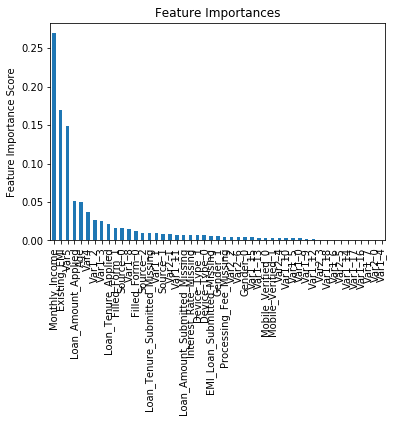

In [10]:
predictors = [x for x in train.columns if x not in [target, IDcol]]
gbm_tuned_4 = GradientBoostingClassifier(learning_rate=0.005, n_estimators=1800,max_depth=9, min_samples_split=1900, min_samples_leaf=60, subsample=0.80, random_state=10, max_features=11,
warm_start=True)
modelfit(gbm_tuned_4, train, predictors, performCV=False)

Therefore, now you can clearly see that this is a very important step as the scores improved.
<br /><br />
Another hack that can be used here is the ‘warm_start’ parameter of GBM. We can use it to increase the number of estimators in small steps and test different values without having to run from starting always.